# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('cleaned_marketing_campaign.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntWines_transformed,MntFruits_transformed,MntMeatProducts_transformed,MntFishProducts_transformed,MntSweetProducts_transformed,MntGoldProds_transformed,NumDealsPurchases_transformed,NumWebPurchases_transformed,NumCatalogPurchases_transformed,NumStorePurchases_transformed
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,25.199206,4.488636,6.304449,5.153292,4.488636,4.488636,0.994099,2.828427,2.223980,2.000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3.316625,0.693147,1.945910,1.098612,0.693147,1.945910,0.841238,1.000000,1.259921,1.414214
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,20.639767,3.912023,4.852030,4.718499,3.091042,3.761200,0.583943,2.828427,1.442250,3.162278
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3.316625,1.609438,3.044522,2.397895,1.386294,1.791759,0.841238,1.414214,1.000000,2.000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,13.152946,3.784190,4.779123,3.850148,3.332205,2.772589,1.174821,2.236068,1.587401,2.449490


selected_columns = ['Customer_segment', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
data = df[selected_columns]

The customer segments prepared while cleaning the data will now be used to show performance of marketing campaigns

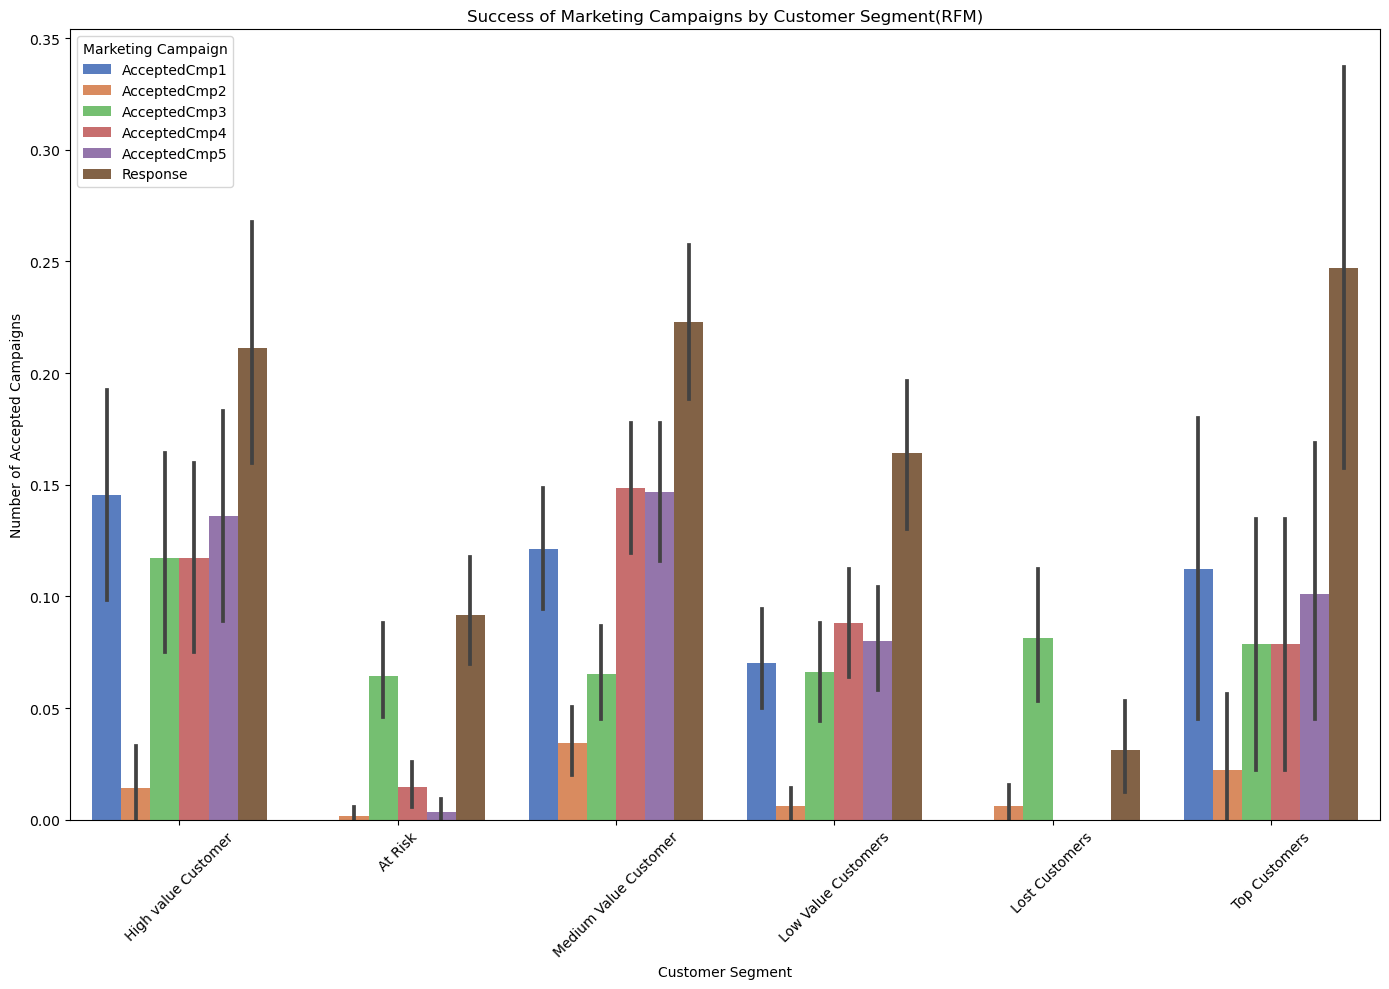

In [3]:
melted_data = pd.melt(df, id_vars='Customer_segment',
                      value_vars = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response'],
                      var_name='Marketing_Campaign',
                      value_name='Accepted')

%matplotlib inline

plt.figure(figsize=(14, 10))
sns.barplot(data=melted_data, x='Customer_segment', y='Accepted', hue='Marketing_Campaign', palette='muted')
plt.title('Success of Marketing Campaigns by Customer Segment(RFM)')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Accepted Campaigns')
plt.xticks(rotation=45)
plt.legend(title='Marketing Campaign')
plt.tight_layout()
plt.show()

The same visual has been replicated in Power BI with proper formatting

# Market Basket Analysis using Apriori Algorithm

In [4]:
df1 = df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
df1.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [5]:
df1 = df1.copy()

df1['Wines'] = np.where(df1['MntWines'] > 0, True, False)
df1['Fruits'] = np.where(df1['MntFruits'] > 0, True, False) 
df1['Meat'] = np.where(df1['MntMeatProducts'] > 0, True, False) 
df1['Fish'] = np.where(df1['MntFishProducts'] > 0, True, False) 
df1['Sweet'] = np.where(df1['MntSweetProducts'] > 0, True, False) 
df1['GoldProds'] = np.where(df1['MntGoldProds'] > 0, True, False) 

df1.drop(['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'],
         axis=1, inplace=True)
minimum_support = 0.8
frequent_items = apriori(df1, min_support=minimum_support, use_colnames=True)

In [6]:
print(df1.head())

   Wines  Fruits  Meat  Fish  Sweet  GoldProds
0   True    True  True  True   True       True
1   True    True  True  True   True       True
2   True    True  True  True   True       True
3   True    True  True  True   True       True
4   True    True  True  True   True       True


The Market basket analysis, takes the boolean or binary values which respresent whether customer has spent any amount on aa product. And then find associations among the itemset. 

In [7]:
rules = association_rules(frequent_items,metric="lift",min_threshold=1)
type(rules)
rules.shape

(68, 10)

In [8]:
pd.set_option('display.max_rows', None)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Wines),(Fruits),0.994136,0.821380,0.817772,0.822595,1.001479,0.001208,1.006849,0.251899
1,(Fruits),(Wines),0.821380,0.994136,0.817772,0.995607,1.001479,0.001208,1.334743,0.008269
2,(Wines),(Meat),0.994136,0.999549,0.994136,1.000000,1.000451,0.000448,inf,0.076923
3,(Meat),(Wines),0.999549,0.994136,0.994136,0.994585,1.000451,0.000448,1.082845,1.000000
4,(Fruits),(Meat),0.821380,0.999549,0.821380,1.000000,1.000451,0.000370,inf,0.002525
5,(Meat),(Fruits),0.999549,0.821380,0.821380,0.821751,1.000451,0.000370,1.002079,1.000000
6,(Fruits),(GoldProds),0.821380,0.972485,0.805142,0.980231,1.007964,0.006362,1.391783,0.044236
7,(GoldProds),(Fruits),0.972485,0.821380,0.805142,0.827922,1.007964,0.006362,1.038017,0.287175
8,(Fish),(GoldProds),0.826793,0.972485,0.809202,0.978723,1.006415,0.005158,1.293189,0.036798
9,(GoldProds),(Fish),0.972485,0.826793,0.809202,0.832096,1.006415,0.005158,1.031587,0.231646


Each row shows the associations among the product, also how a product would be affected if it was placed independently, or with some other product

# Customer segmentation using K-Means Algorithm

In [9]:
education_dummies = pd.get_dummies(df['Education'], prefix='Education')
marital_status = pd.get_dummies(df['Marital_Status'],prefix='Marital_Status')
df['Has_Children'] = np.where(np.logical_or(df['Kidhome'] > 0,df['Teenhome'] > 0),1,0 )

df = pd.concat([df, marital_status, education_dummies], axis=1)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,False,False,True,False,False,False,False,True,False,False
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,False,False,True,False,False,False,False,True,False,False
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,False,False,False,True,False,False,False,True,False,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,False,False,False,True,False,False,False,True,False,False
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,False,True,False,False,False,False,False,False,False,True


K-Means algorithm works with numeric data so creating dummy features to represent categorical features

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Days_Since_Enrolled',
       'Frequency', 'Monetary', 'recency_score', 'frequency_score',
       'monetary_score', 'RFM_SCORE', 'R_rank_norm', 'F_rank_norm',
       'M_rank_norm', 'RFM_Score', 'Customer_segment', 'Kidhome_transformed',
       'MntWines_transformed', 'MntFruits_transformed',
       'MntMeatProducts_transformed', 'MntFishProducts_transformed',
       'MntSweetProducts_transformed', 'MntGoldProds_transformed',
       'NumDealsPurchases_transformed', 'NumWebPurchases_transformed',
       'NumCatalogPurchase

  File "C:\Users\abdul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


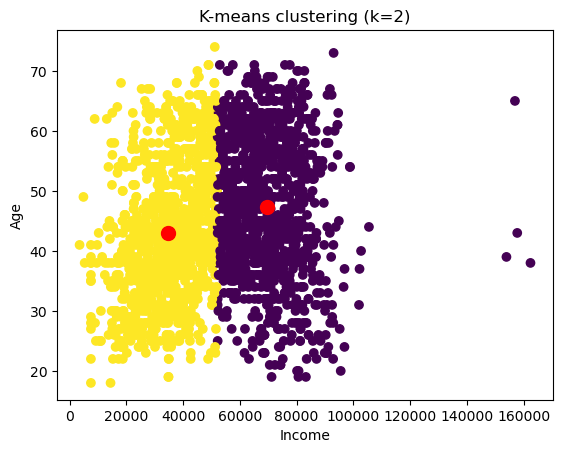

291418495385.32666


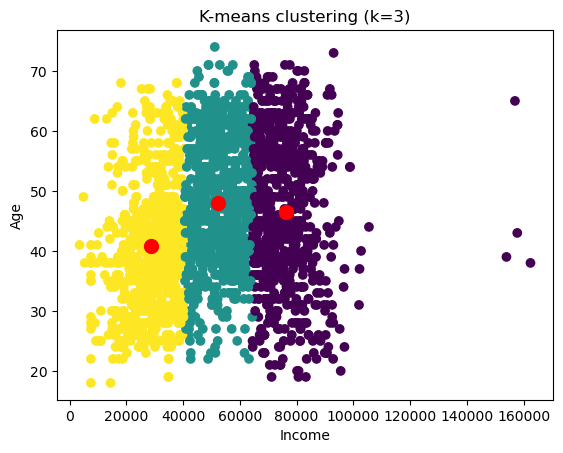

156739296652.42557


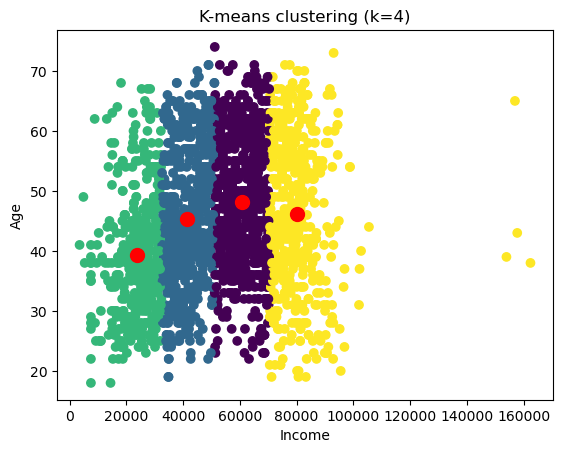

102242360863.38507


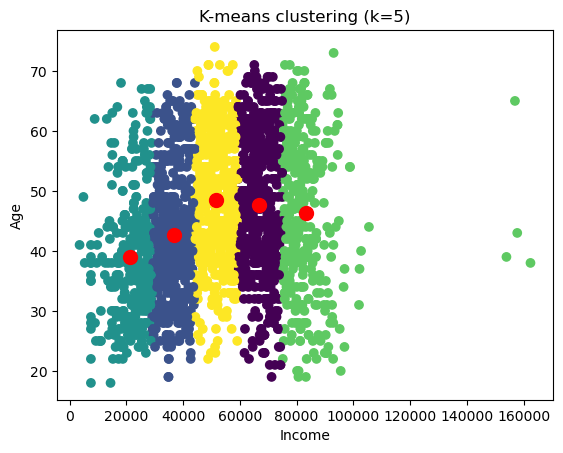

72940859094.83897


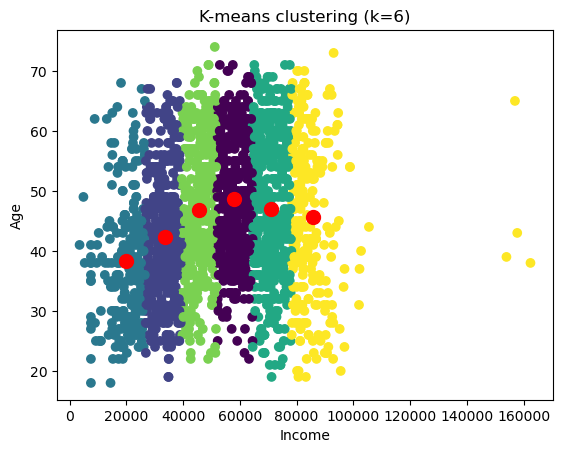

59212524287.453026


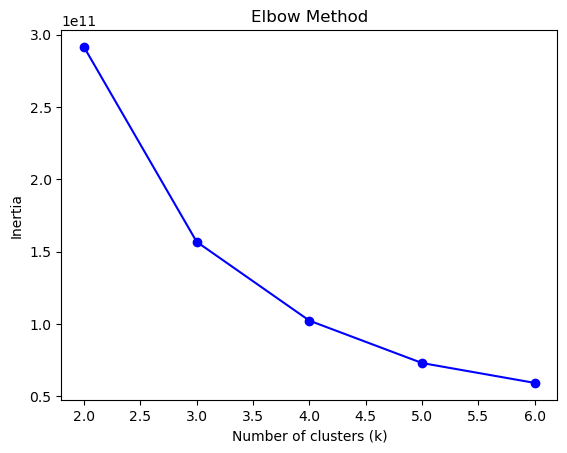

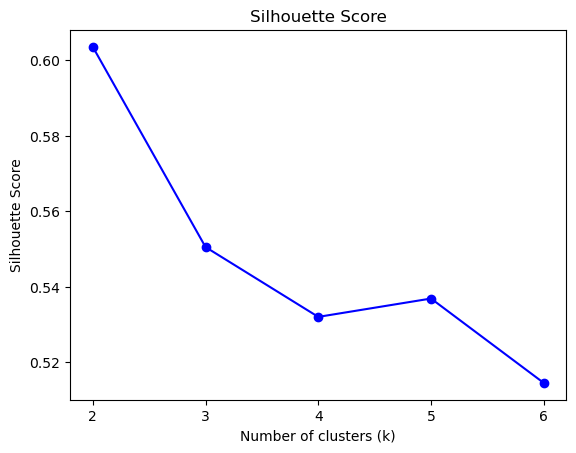

In [11]:
X = df[['Income', 'Age', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow','Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD','Has_Children','Recency','Frequency','Monetary','RFM_Score']]
k_range = range(2, 7)

inertia_values = []
silhouette_scores = []

for k in k_range:
    %matplotlib inline
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    inertia_values.append(kmeans.inertia_)
    silhouette = silhouette_score(X[['Income', 'Age']], kmeans.labels_)
    silhouette_scores.append(silhouette)

    plt.scatter(X['Income'], X['Age'], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Income')
    plt.ylabel('Age')
    plt.show()
    print(kmeans.inertia_)

plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.plot(k_range, silhouette_scores, 'bo-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.show()

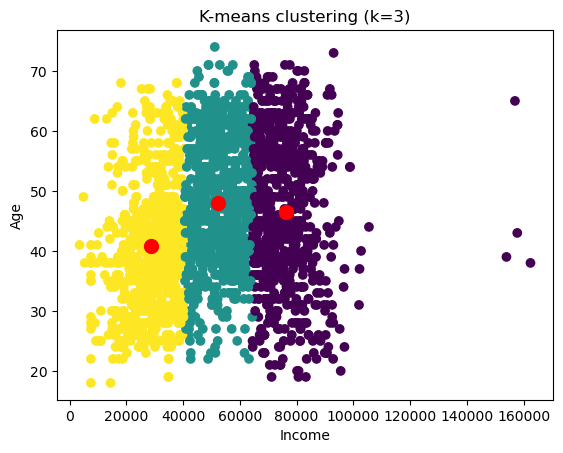

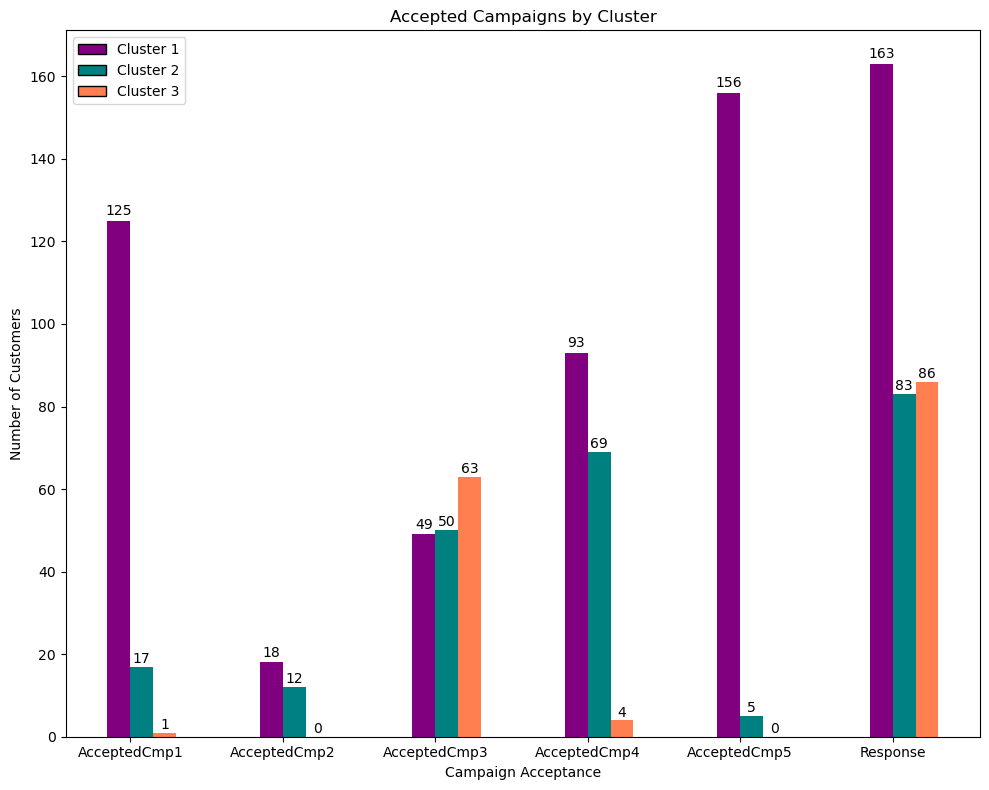

In [12]:
    %matplotlib inline

    k = 3

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.scatter(X['Income'], X['Age'], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Income')
    plt.ylabel('Age')

    cluster_counts = df.groupby(y_kmeans)[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum()

    plt.figure(figsize=(10, 8))

    bar_width = 0.15
    
    colors = ['purple','teal','coral','blue', 'green', 'orange','yellow','black','red','purple'] 

    for cluster in range(k):
        x_pos = np.arange(len(cluster_counts.columns)) + cluster * bar_width

        for i, col in enumerate(cluster_counts.columns):
            plt.bar(x_pos[i], cluster_counts.loc[cluster, col], width=bar_width,
                    color=colors[cluster], label=f'Cluster {cluster + 1}', align='center')
            total = cluster_counts.loc[cluster].sum()  
            
            plt.text(x_pos[i], cluster_counts.loc[cluster, col] + 0.001 * total, 
                str(cluster_counts.loc[cluster, col]), ha='center', va='bottom')
            
    plt.xlabel('Campaign Acceptance')
    plt.ylabel('Number of Customers')
    plt.title('Accepted Campaigns by Cluster')
    plt.xticks(np.arange(len(cluster_counts.columns)) + 0.5 * bar_width, cluster_counts.columns)
    legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], ec="k", label=f'Cluster {i+1}') for i in range(k)]
    plt.legend(handles=legend_handles)
    
    plt.tight_layout()
    plt.show()


In [13]:
X.columns

Index(['Income', 'Age', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Has_Children', 'Recency', 'Frequency', 'Monetary', 'RFM_Score'],
      dtype='object')

In [14]:
column_name = 'Monetary'
index_position = X.columns.get_loc(column_name)

print("Index position of column '{}': {}".format(column_name, index_position))

Index position of column 'Monetary': 15


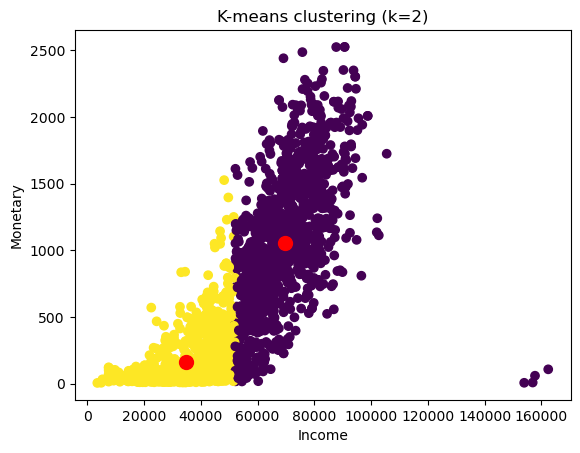

Inertia for k = 2: 291416278416.3005


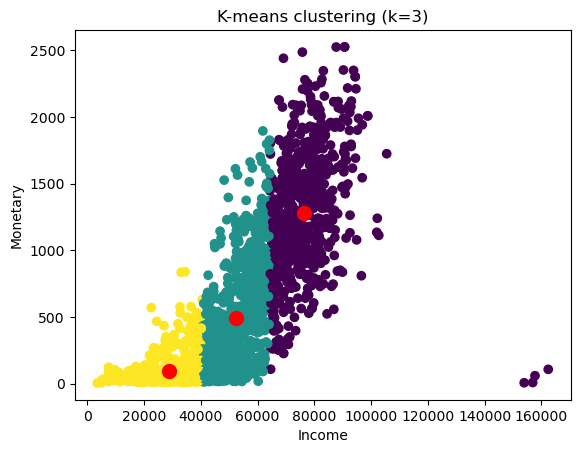

Inertia for k = 3: 156745512297.97394


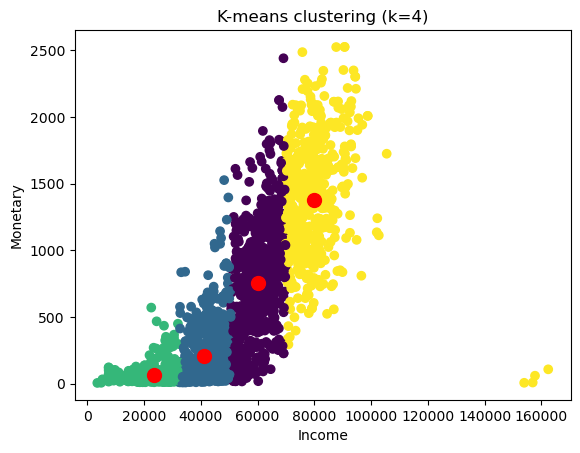

Inertia for k = 4: 102355920591.90604


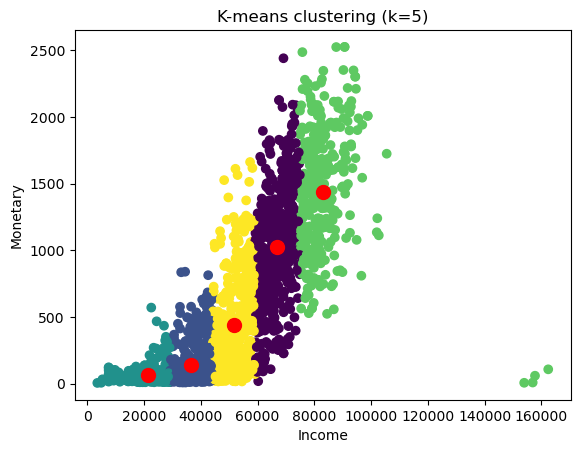

Inertia for k = 5: 72953598226.25526


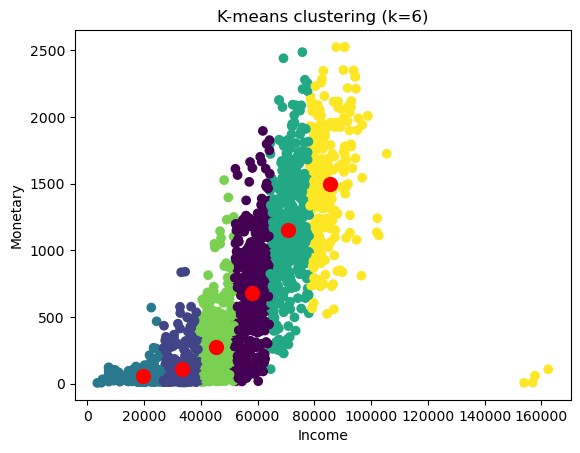

Inertia for k = 6: 59226495087.40461


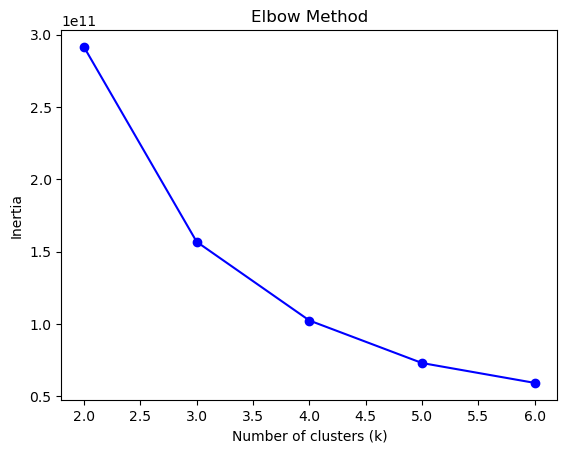

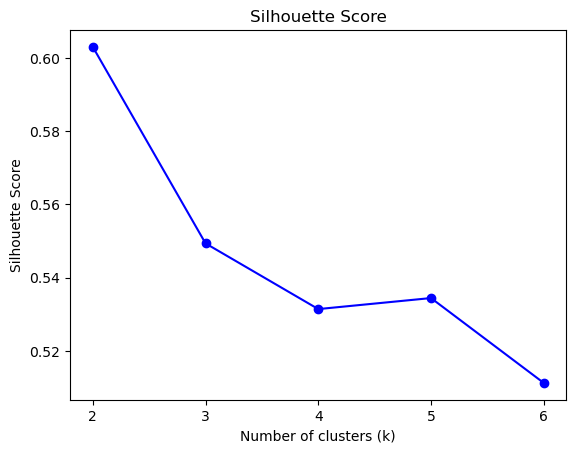

In [15]:
inertia_values = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X[['Income', 'Monetary']])
    
    inertia_values.append(kmeans.inertia_)
    silhouette = silhouette_score(X[['Income', 'Monetary']], kmeans.labels_)
    silhouette_scores.append(silhouette)

    plt.scatter(X['Income'], X['Monetary'], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Income')
    plt.ylabel('Monetary')
    plt.show()
    print("Inertia for k = {}: {}".format(k, kmeans.inertia_))

plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.plot(k_range, silhouette_scores, 'bo-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.show()


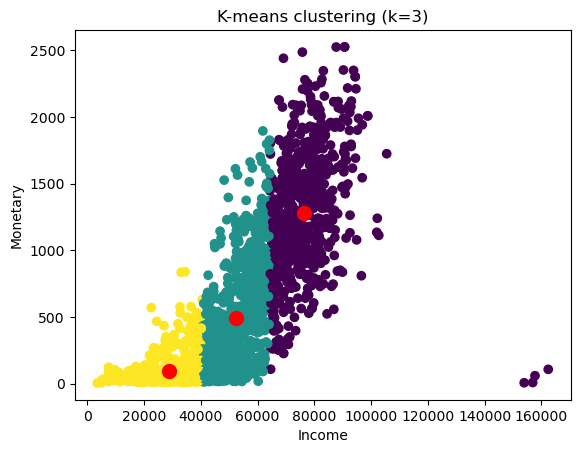

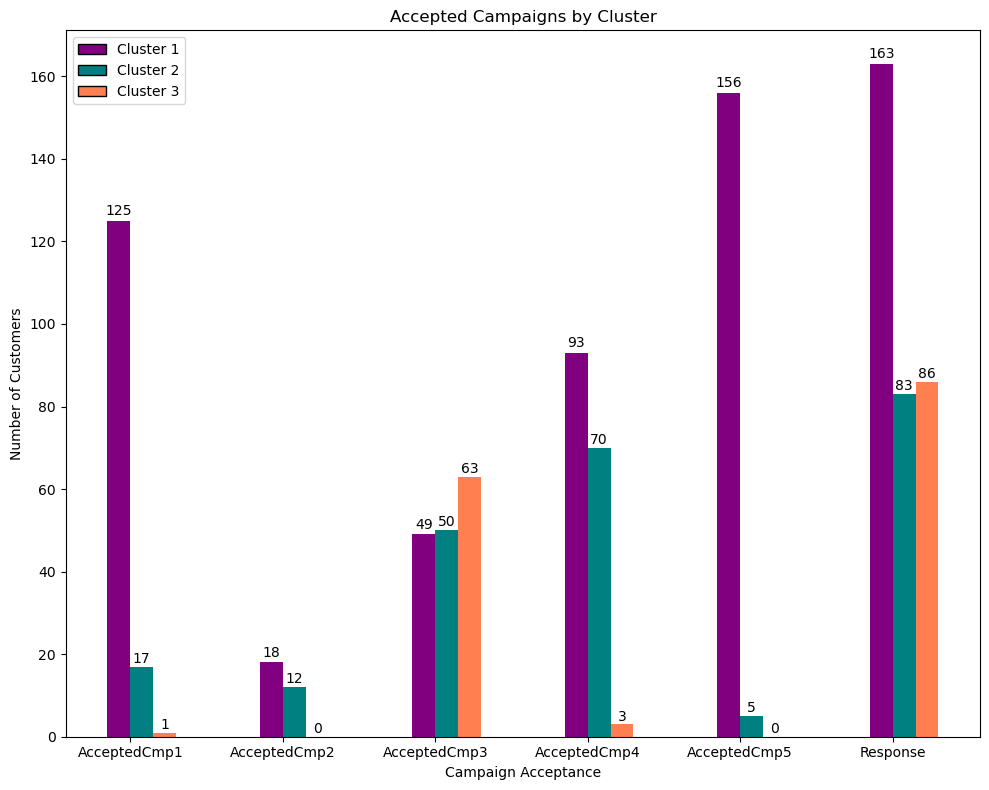

In [16]:
    %matplotlib inline

    k = 3

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X[['Income', 'Monetary']])
    
    plt.scatter(X['Income'], X['Monetary'], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Income')
    plt.ylabel('Monetary')
    plt.show()

    cluster_counts = df.groupby(y_kmeans)[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum()

    plt.figure(figsize=(10, 8))

    bar_width = 0.15
    
    colors = ['purple','teal','coral','blue', 'green', 'orange','yellow','black','red','purple'] 

    for cluster in range(k):
        x_pos = np.arange(len(cluster_counts.columns)) + cluster * bar_width

        for i, col in enumerate(cluster_counts.columns):
            plt.bar(x_pos[i], cluster_counts.loc[cluster, col], width=bar_width,
                    color=colors[cluster], label=f'Cluster {cluster + 1}', align='center')
            total = cluster_counts.loc[cluster].sum()  
            
            plt.text(x_pos[i], cluster_counts.loc[cluster, col] + 0.001 * total, 
                str(cluster_counts.loc[cluster, col]), ha='center', va='bottom')
            
    plt.xlabel('Campaign Acceptance')
    plt.ylabel('Number of Customers')
    plt.title('Accepted Campaigns by Cluster')
    plt.xticks(np.arange(len(cluster_counts.columns)) + 0.5 * bar_width, cluster_counts.columns)
    legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], ec="k", label=f'Cluster {i+1}') for i in range(k)]
    plt.legend(handles=legend_handles)
    
    plt.tight_layout()
    plt.show()

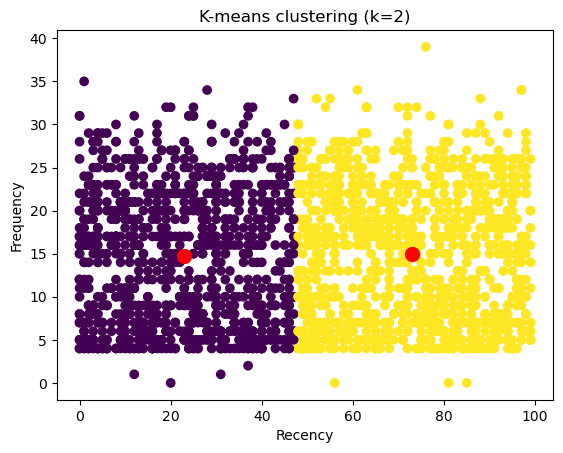

Inertia for k = 2: 596336.37418582


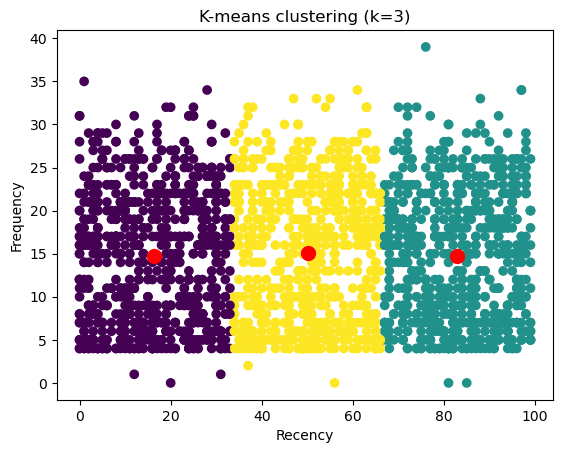

Inertia for k = 3: 330528.8347673473


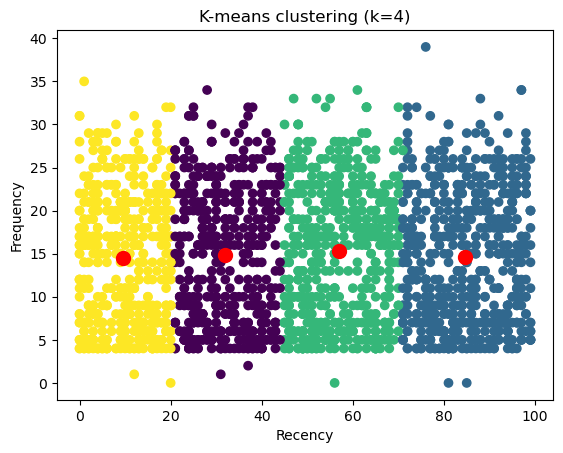

Inertia for k = 4: 245393.37225452976


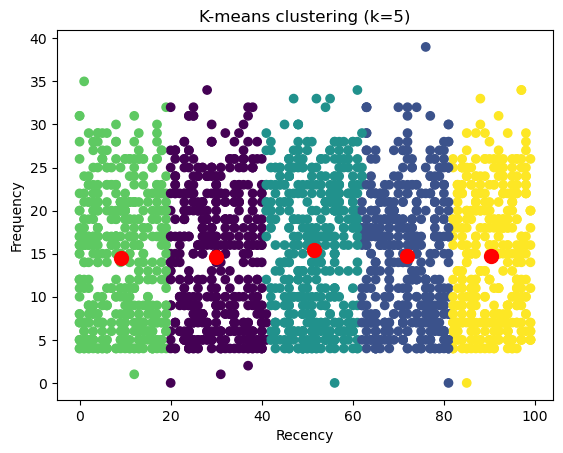

Inertia for k = 5: 200083.0937493141


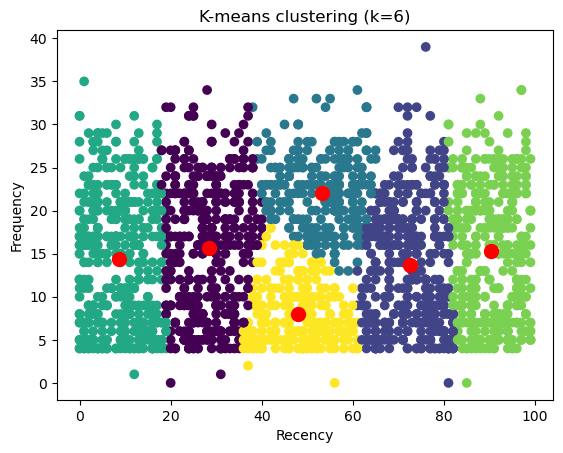

Inertia for k = 6: 174041.63361071012


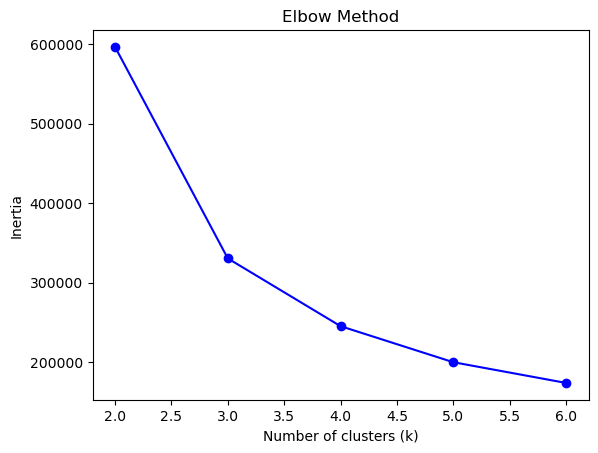

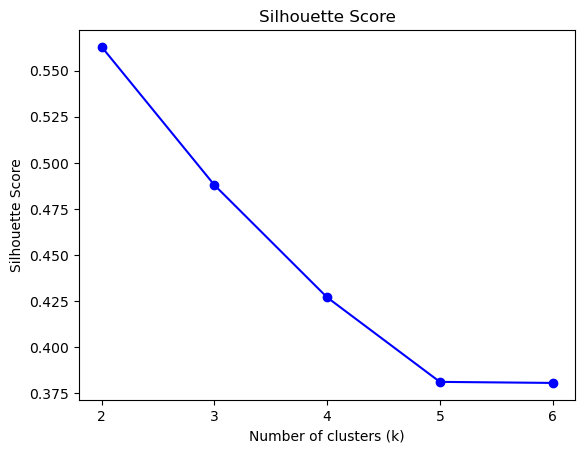

In [17]:
inertia_values = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X[['Recency', 'Frequency']])
    
    inertia_values.append(kmeans.inertia_)
    silhouette = silhouette_score(X[['Recency', 'Frequency']], kmeans.labels_)
    silhouette_scores.append(silhouette)

    plt.scatter(X['Recency'], X['Frequency'], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.show()
    
    print("Inertia for k = {}: {}".format(k, kmeans.inertia_))

plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.plot(k_range, silhouette_scores, 'bo-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.show()

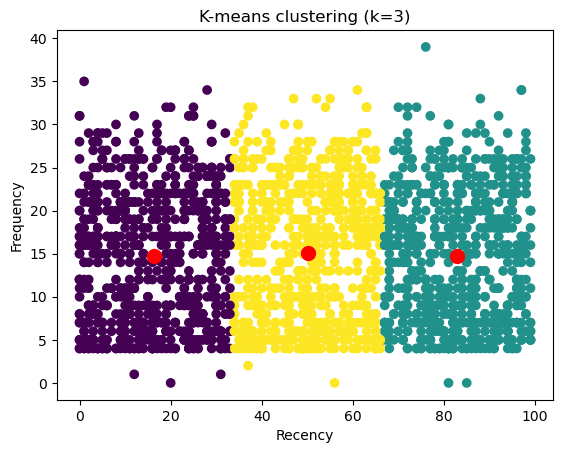

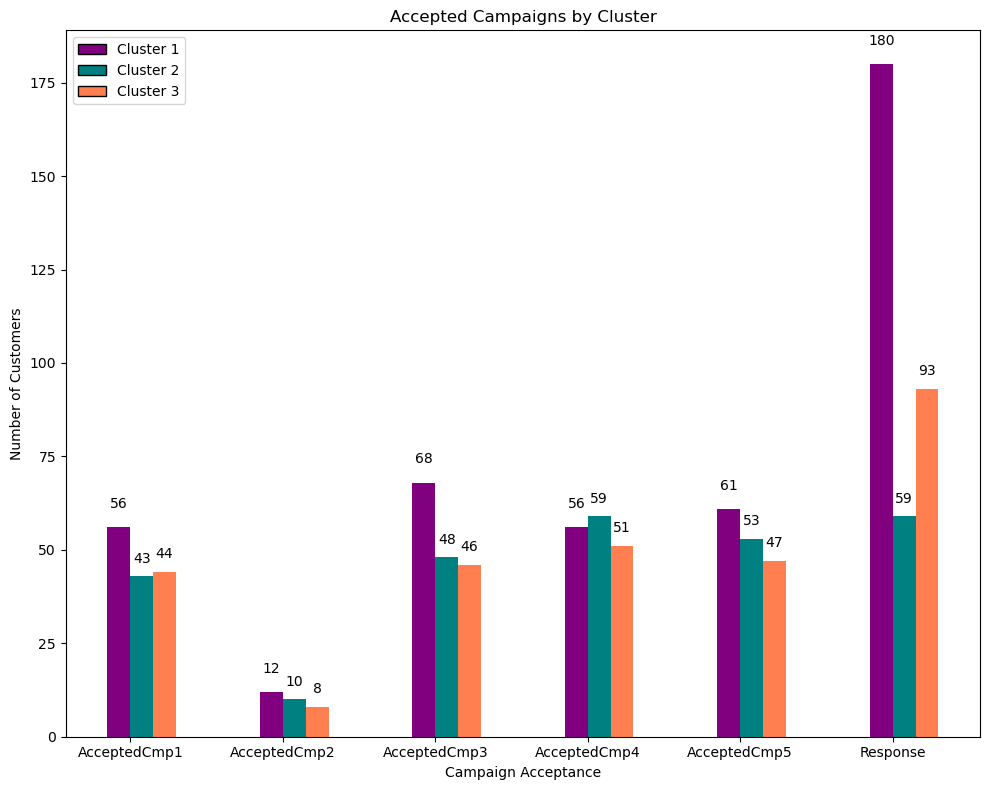

In [18]:
%matplotlib inline
k = 3

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X[['Recency', 'Frequency']])

plt.scatter(X['Recency'], X['Frequency'], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title('K-means clustering (k={})'.format(k))
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

cluster_counts = df.groupby(y_kmeans)[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum()

plt.figure(figsize=(10, 8))

bar_width = 0.15
colors = ['purple', 'teal', 'coral', 'blue', 'green', 'orange', 'yellow', 'black', 'red', 'purple']

for cluster in range(k):
    x_pos = np.arange(len(cluster_counts.columns)) + cluster * bar_width

    for i, col in enumerate(cluster_counts.columns):
        plt.bar(x_pos[i], cluster_counts.loc[cluster, col], width=bar_width,
                color=colors[cluster], label=f'Cluster {cluster + 1}', align='center')
        
        total = cluster_counts.loc[cluster].sum()
        plt.text(x_pos[i], cluster_counts.loc[cluster, col] + 0.01 * total, str(cluster_counts.loc[cluster, col]),
                 ha='center', va='bottom')

plt.xlabel('Campaign Acceptance')
plt.ylabel('Number of Customers')
plt.title('Accepted Campaigns by Cluster')
plt.xticks(np.arange(len(cluster_counts.columns)) + 0.5 * bar_width, cluster_counts.columns)

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i], ec="k", label=f'Cluster {i+1}') for i in range(k)]
plt.legend(handles=legend_handles)

plt.tight_layout()
plt.show()


In [19]:
df.to_csv('cleaned_marketing_campaign2.csv',index=False)